# Stock Price Data Exploration 

We were deciding between two different methods of grabbing the stock data. 
1. via API calls from (where??)
2. via direct CSV download from NASDAQ 

We decided on the second because it would be simpler and fulfill our purposes for the project.

For initial exploration of data we thought about some of the aspects of the data that we would be interested in seeing. The data gives us a couple of metrics (<--what word do i use here??) to work with:

* Close - The price of the stock at the end of the trading day.
* Open - The price of the stock at the beginning of the trading day.
* Volume - The number of shares that were traded that day
* High - The peak price of the stock for that day
* Low - The lowest price of the stock for that day

What sort of relationships between these metrics did we want to see?

1. We can look at how a given metric can change over different windows/intervals of time. For example, how the closing price changed over the course of the last month versus the change over the last year.

2. Which metrics are more meaningful?
    * We're not really sure yet, so we should probably have a function that takes in the metric as a parameter and graphs accordingly.

We created functions that would allow us to generate these relationships with greater ease.

* filter_data_by_date
  * Allows us to choose the time interval we want to look at and filters the data to match this interval
  
* plot_stock_data
  * Function that plots the metric of our choosing.

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [12]:
aapl_data = pd.read_csv('AAPL.csv', parse_dates = [0], keep_date_col = True)
aapl_data.head(n=5)

,date,close,volume,open,high,low
0,2016-11-04,108.84,30790930.0,108.53,110.25,108.11
1,2016-11-03,109.83,26538700.0,110.98,111.46,109.55
2,2016-11-02,111.59,28174980.0,111.40,112.35,111.23
3,2016-11-01,111.49,43403760.0,113.46,113.77,110.53
4,2016-10-31,113.54,26378910.0,113.65,114.23,113.20


[-0.0469636]
119.119823725
[ 0.04454854]
114.53017786
[-0.22118206]
118.157101634
[-0.14495489]
117.192571429


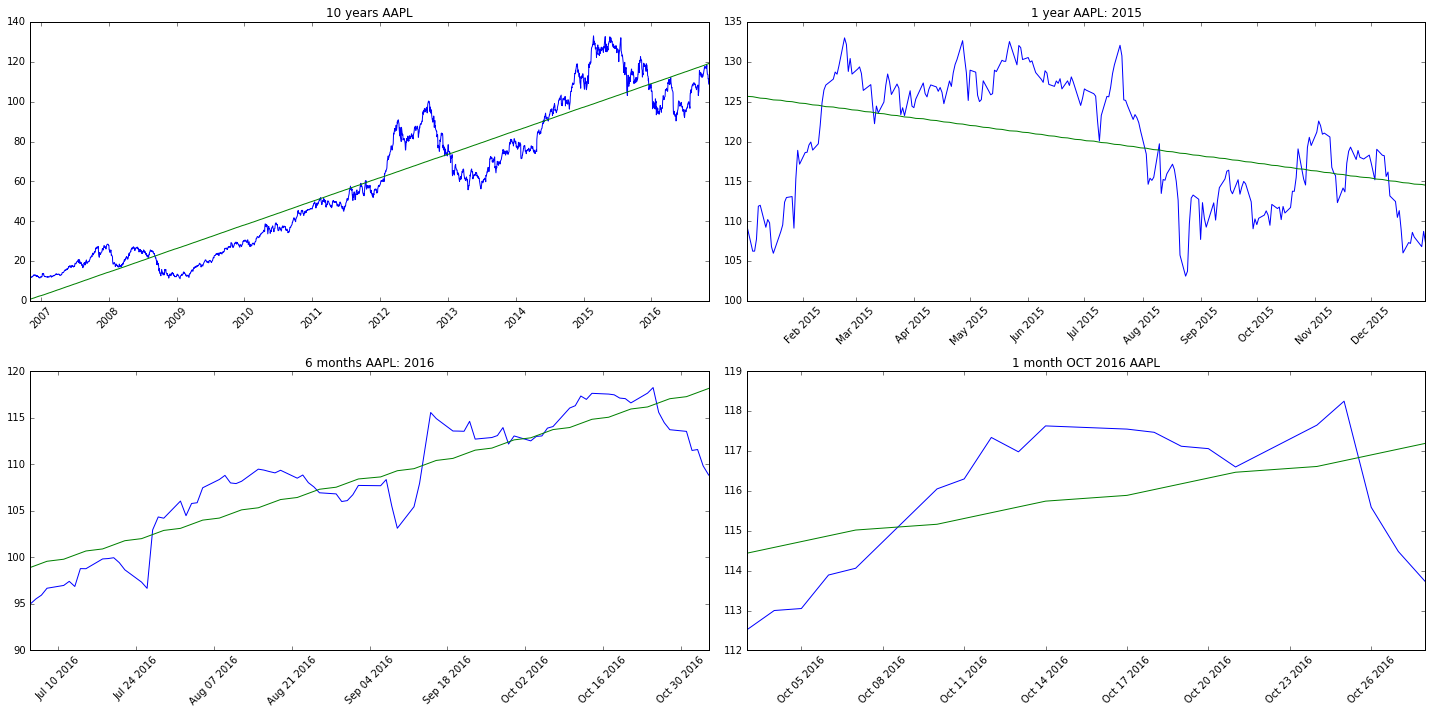

In [79]:
def filter_data_by_date(data, date_start, date_end):
    return data[(data['date'] > date_start) & (data['date'] < date_end)]

def plot_stock_data(data, ax, option="close", title="", lin_reg=False):
    ax.set_title(title)
    ax.plot(data['date'].values, data[option].values)
    
    if(lin_reg):
        lin_reg = linear_model.LinearRegression()
        x_vals = np.arange(len(data['date'].values)).reshape(len(data['date'].values),1)
        lin_reg.fit(x_vals, data[option].values)
        
        print lin_reg.coef_
        print lin_reg.intercept_
        
        x = np.arange(len(data['date'].values))
        y = eval(str(lin_reg.intercept_)+ "+ x*" + str(lin_reg.coef_[0]))
        ax.plot(data['date'].values, y)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plot_stock_data(aapl_data, ax[0][0], title="10 years AAPL", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2015-1-1', '2015-12-31'), ax[0][1], title="1 year AAPL: 2015", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-7-1', '2016-12-31'), ax[1][0], title="6 months AAPL: 2016", lin_reg=True)
plot_stock_data(filter_data_by_date(aapl_data,'2016-10-1', '2016-10-31'), ax[1][1], title="1 month OCT 2016 AAPL", lin_reg=True)
plt.tight_layout()
plt.show()